<a href="https://colab.research.google.com/github/daniel-kelly/goodreads_author_map/blob/main/goodreads_author_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installing external packages

The key package we will use to plot data on the world map is geopandas, but there are some dependencies in mapclassify that will also be required.

First we need to install these using pip

In [2]:
!pip install geopandas && pip install mapclassify

     |████████████████████████████████| 1.0 MB 7.4 MB/s 
     |████████████████████████████████| 16.7 MB 425 kB/s 
     |████████████████████████████████| 6.3 MB 52.8 MB/s 


### Importing packages

Now we import these above packages, as well as some pre-installed packages

In [3]:
# Data management, visualisation and anaysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

# Progress bars
from tqdm import tqdm

# Web scraping
from bs4 import BeautifulSoup
import requests

# Map plotting
import geopandas, mapclassify

### Export your reading data from Goodreads
To get your Goodreads data go to http://www.goodreads.com, log in and navigate to the 'My Books' tab. In the list of options on the left side of the page, go to **Tools/Import and export**. Click the **Export Library** button and once it has been generated it click and save it.

### Upload Goodreads data
Drag and drop your Goodreads export file (in .csv format) to the Colab workbook by dragging and dropping it to the folder on the left. 

If you are using my example export (goodreads_library_export_dk.csv), download it from the Github repository and drop it into the Google Colab Files tab on the left side of this page.

In [ ]:
# I have named my goodreads file with my initials at the end. 
# If I download someone else's I can name theirs with their intials and simply switch this variable to change all data inputs and plot outputs
person='dk'
file_name=f'goodreads_library_export_{person}.csv'
print(file_name)

# Make sure the output of file_name matches your csv file name!

In [4]:
# Load the goodreads csv datafiles
data=pd.read_csv(file_name) 

# Show the dataframe
data

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,...,Private Notes,Read Count,Recommended For,Recommended By,Owned Copies,Original Purchase Date,Original Purchase Location,Condition,Condition Description,BCID
0,77507,"Red Mars (Mars Trilogy, #1)",Kim Stanley Robinson,"Robinson, Kim Stanley",NaN,"=""0553560735""","=""9780553560732""",0,3.86,Spectra Books,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,40275288,The Priory of the Orange Tree,Samantha Shannon,"Shannon, Samantha",NaN,"=""""","=""""",4,4.23,Bloomsbury Publishing,...,NaN,2,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,52283742,Contact,Carl Sagan,"Sagan, Carl",NaN,"=""""","=""""",4,4.13,Simon & Schuster,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,58945943,The Diving-Bell and the Butterfly,Jean-Dominique Bauby,"Bauby, Jean-Dominique",NaN,"=""""","=""""",5,3.97,NaN,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,10664113,"A Dance with Dragons (A Song of Ice and Fire, #5)",George R.R. Martin,"Martin, George R.R.",NaN,"=""""","=""""",4,4.32,Bantam,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,26084716,"The Disaster Artist: My Life Inside The Room, ...",Greg Sestero,"Sestero, Greg",Tom Bissell,"=""0751561878""","=""9780751561876""",5,4.26,Sphere,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
187,18885297,An Astronaut's Guide to Life on Earth,Chris Hadfield,"Hadfield, Chris",NaN,"=""""","=""9781447257127""",4,4.15,Macmillan,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
188,23298594,Ayoade on Ayoade,Richard Ayoade,"Ayoade, Richard",NaN,"=""""","=""""",4,3.47,Faber & Faber,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
189,23346740,Sapiens: A Brief History of Humankind,Yuval Noah Harari,"Harari, Yuval Noah","John Purcell, Haim Watzman","=""""","=""""",4,4.39,Vintage,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


### Refining the dataframe
We don't need a lot of the data columns so we will just take a list of authors from that have a book tagged 'read' and create a new dataframe

In [5]:
# We are only extracting the books with shelf label 'read'
target_shelf='read'
authors_read=data['Author'][data['Exclusive Shelf']==target_shelf]

# If you want to filter by a personal shelf, uncomment the line below and specify the desired shelf in the variable target_shelf
#authors_read=data['Author'][data['Bookshelves']==target_shelf] 

# New data frame just with 'read' authors
ndf=pd.DataFrame(authors_read) 

ndf=ndf.reset_index()
del ndf['index']

In [6]:
# Gets a list of the 'read' authors
author_list=list(ndf['Author'])

# Count number of times each author appears in the list, i.e. number of books by each
author_dict = {i:author_list.count(i) for i in author_list} 

In [7]:
# Adds a value for books read for each author in the dataframe
for author in ndf['Author']:
  ndf.loc[ndf['Author']==author,'Books read'] = author_dict[author]

In [8]:
# Now that the number of books per author is in the dataframe we can delete the extra author entries
ndfd=ndf.drop_duplicates()

ndfd=ndfd.reset_index()
del ndfd['index']

# Now update the variable 'author list' (no duplicates)
author_list=list(ndfd['Author']) 

In [9]:
# Create columns for book titles per author and their corresponding goodreads ID numbers
ndfd['Book titles'],ndfd['Book IDs']=ndfd['Author'],ndfd['Author'] 

In [10]:
# Get the real book titles and ID numbers for each authors from the goodreads dataframe and add them to the new dataframe
for i,j in enumerate(author_list):
    ndfd['Book titles'].iloc[i] = list(data[data['Author']==j]['Title'])
    ndfd['Book IDs'].iloc[i] = list(data[data['Author']==j]['Book Id'])

# Create a column for the country each author comes from
ndfd['Country']=['None']*len(ndfd['Author'])

# Ignore the warnings

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
ndfd

,Author,Books read,Book titles,Book IDs,Country
0,Samantha Shannon,1.0,[The Priory of the Orange Tree],[40275288],None
1,Carl Sagan,1.0,[Contact],[52283742],None
2,Jean-Dominique Bauby,1.0,[The Diving-Bell and the Butterfly],[58945943],None
3,George R.R. Martin,6.0,"[A Dance with Dragons (A Song of Ice and Fire,...","[10664113, 13497, 62291, 10572, 13496, 18635622]",None
4,Stephen King,7.0,"[Stephen King Goes to the Movies, Doctor Sleep...","[3583368, 18741301, 10644930, 11588, 10614, 83...",None
...,...,...,...,...,...
98,John Buchan,1.0,[The Thirty-Nine Steps],[18680050],None
99,Greg Sestero,1.0,"[The Disaster Artist: My Life Inside The Room,...",[26084716],None
100,Chris Hadfield,1.0,[An Astronaut's Guide to Life on Earth],[18885297],None
101,Richard Ayoade,1.0,[Ayoade on Ayoade],[23298594],None


### Getting author nationalities

We will parse wikipedia pages for nationalities, then reference this data file to convert the nationality (adjectival) to country name. For example: *Stephen Edwin King (born September 21, 1947) is an American author of horror, supernatural fiction, suspense, crime, science-fiction, and fantasy novels.*

The nationality will be recorded as **American**, which will be converted to **United States**. To get a list of adjectivals and countrys we can reference a [table](https://en.wikipedia.org/wiki/List_of_adjectival_and_demonymic_forms_for_countries_and_nations) on Wikipedia.

In [12]:
url='https://en.wikipedia.org/wiki/List_of_adjectival_and_demonymic_forms_for_countries_and_nations'
page=requests.get(url)
soup = BeautifulSoup(page.content,'html.parser')
table = soup.find('table', {'class' : "wikitable sortable"})

co,ad=[],[]
rows = table.find_all('tr')
for row in rows[1:]:
  r=row.find_all('td')
  for i in r[1].find_all('a'):
      ad.append(i.text)
      co.append(r[0].find_all('a')[0].text)
adjs=pd.DataFrame(data=zip(co,ad),columns=['Country','Adjectival'])

We will 'scrape' the wikipedia page for each author using the function below:

In [13]:
def wiki_paragraphs(
    query
            ):
    '''
    Function pulls a url of the form 'https://en.wikipedia.org/wiki/'+**query**
    Where query is an input keyword
    Requested url is scraped and all retrieved paragraphs (based on html <p> attribute) are returned in list form
    '''
    query.replace(' ','_')
    url='https://en.wikipedia.org/wiki/'+query
    page=requests.get(url)
    soup = BeautifulSoup(page.content,'html.parser')

    paragraphs=[]
    for tag in soup.find_all():
        if tag.name=='p':
            paragraphs.append(tag.text)
            
    return paragraphs

With the function defined, we loop through every author in the list, try to locate their Wikipedia page and add their nationality to the dataframe. 

If no Wikipedia page is available for the author, or no mention of nationality is made in the first few paragraphs, their Goodreads profile will be scraped to see if a place of birth is listed. 

Bear in mind this can take a while if you have a lot of entries, though a progress bar should give a general idea of the timescale.

In [124]:
for author in tqdm(ndfd['Author'][:]):  # Loops through all authors  

    paragraphs=wiki_paragraphs(author+' (writer)') 
    # First looks for wikipedia page with format 'Firstname_Lastname (writer)'
    
    if any('Other reasons this message' in pp for pp in paragraphs[:4]): # If no page found, tries again with form
        paragraphs=wiki_paragraphs(author+' (author)')                   # 'Firstname_Lastname (author)'
                
    if any('Other reasons this message' in pp for pp in paragraphs[:4]): # If no page found, tries general format:
        paragraphs=wiki_paragraphs(author+'')                            # 'Firstname_Lastname'
    
    # Flatten the paragraphs into a single list of words
    pf=[]
    for i in paragraphs[:5]:
      for j in i.split(' '):
        pf.append(j)

    country_list=[]  # Create a blank list to store nationalities

    # Loop through each word in the paragraph, check whether it appears in the list of adjectivals. 
    # If so, add the corresponding country to the author entry dataframe, then terminate the loop
    for i in pf:
      c=adjs['Country'].iloc[np.where(adjs['Adjectival']==i)[0]]
      if len(c)>0:
        country_list.append(adjs['Country'].iloc[np.where(adjs['Adjectival']==i)[0][0]])
        break
    
    if len(country_list)!=0: 
        ndfd['Country'][ndfd['Author']==author]=country_list[0] 


    # If no countries were detected from the Wikipedia entries, check the author's Goodreads profile    
    elif len(country_list)==0:

        # First find a book by the author and use its Goodreads ID to navigate to the Goodreads page for said book
        book_title=list(ndfd[ndfd['Author']==author]['Book titles'])[0][0].replace(' ','-').lower()
        book_id=list(ndfd[ndfd['Author']==author]['Book IDs'])[0][0]

        book_query=f'{book_id}-{book_title}'
        book_url='https://www.goodreads.com/book/show/'+book_query

        book_page=requests.get(book_url)
        book_soup = BeautifulSoup(book_page.content,'html.parser')

        # Find the URL to the author's page on the book page
        # The URL can sometimes be found with different labels, so if statement checks both
        author_url=book_soup.find(name='a',attrs={'class':'authorName'})
        if author_url!=None:
            author_url=author_url.attrs['href']
            
            author_page=requests.get(author_url)
            author_soup=BeautifulSoup(author_page.content,'html.parser')

            # Looks for the "Born in" field and takes the text entry
            country_text=author_soup.find('div',text='Born')
            if country_text!=None:
              country_text=country_text.next_sibling.split('\n')[1]
        
        elif author_url==None:
            author_url=book_soup.find(attrs={'property':'og:url'})
            
            if author_url!=None:
                author_url=author_url.attrs['content']
                
                author_page=requests.get(author_url)
                author_soup=BeautifulSoup(author_page.content,'html.parser')
                country_text=author_soup.find('div',text='Born')
                if country_text!=None:
                  country_text=country_text.next_sibling.split('\n')[1]
                
        else:
            continue
        
            # If the author was listed as being "Born in" a country on their Goodreads profile
            # Add the listed country to the author entry in dataframe
            for i in adjs['Country']:
                if i in country_text:#
                    country_list.append(i)
                    ndfd['Country'][ndfd['Author']==author]=country_list[0] 
    
    # If no country was found on either Wikipedia or Goodreads, the field is left blank     
    elif len(country_list)==0:
        ndfd['Country'][ndfd['Author']==author]=''

    # Uncomment this line if you want to print out each author and their nationality as they are generated (full list will be available after regardless)
    #print(f'{author}: {country_list}')

  0%|          | 0/103 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
100%|██████████| 103/103 [03:17<00:00,  1.92s/it]


Now we can check the data frame with the corresponding country for each author (we will save this as a csv/Excel-compatible file later on, don't worry)

In [125]:
ndfd

,Author,Books read,Book titles,Book IDs,Country
0,Samantha Shannon,1.0,[The Priory of the Orange Tree],[40275288],United Kingdom of Great Britain and Northern I...
1,Carl Sagan,1.0,[Contact],[52283742],United States of America
2,Jean-Dominique Bauby,1.0,[The Diving-Bell and the Butterfly],[58945943],France
3,George R.R. Martin,6.0,"[A Dance with Dragons (A Song of Ice and Fire,...","[10664113, 13497, 62291, 10572, 13496, 18635622]",United States of America
4,Stephen King,7.0,"[Stephen King Goes to the Movies, Doctor Sleep...","[3583368, 18741301, 10644930, 11588, 10614, 83...",United States of America
...,...,...,...,...,...
98,John Buchan,1.0,[The Thirty-Nine Steps],[18680050],United Kingdom of Great Britain and Northern I...
99,Greg Sestero,1.0,"[The Disaster Artist: My Life Inside The Room,...",[26084716],United States of America
100,Chris Hadfield,1.0,[An Astronaut's Guide to Life on Earth],[18885297],Canada
101,Richard Ayoade,1.0,[Ayoade on Ayoade],[23298594],United Kingdom of Great Britain and Northern I...


Similarly, we can see the authors for whom no country was detected. We do this by seeing which author's country entries are equal to 'None'

In [86]:
ndfd[ndfd['Country']=='None']

,Author,Books read,Book titles,Book IDs,Country
24,M.R. Carey,1.0,[The Book of Koli (Rampart Trilogy #1)],[48496140],None
33,Seb Falk,1.0,[The Light Ages: A Medieval Journey of Discovery],[54808208],None
51,Ronan Hession,1.0,[Leonard and Hungry Paul],[44101668],None


### Plotting data on world map

The final step is to visualise the distribution of books/authors across the map. We are going to use the geopandas package to accomplish this.

In [127]:
path = geopandas.datasets.get_path('naturalearth_lowres')

# Create a new data set with the list of countries, their shapes (for the map) and extra data we can discard
df = geopandas.read_file(path)

In [128]:
# Create new columns to store the number of authors read and number of books read for each country
df['Authors read']=df['pop_est']*0
df['Books read']=df['pop_est']*0

In [129]:
# As the map data only includes a polygon for the United Kingdom, we need to convert any authors listed as Scottish, Welsh etc. to UK
britain=['United Kingdom of Great Britain and Northern Ireland','England','Scotland','Wales','Northern Ireland']
for i in britain:
  ndfd.loc[ndfd['Country']==i,'Country']='United Kingdom'

# Likewise, we need to make sure the author country names match with the map data, hence we alter the author names for the USA
ndfd.loc[ndfd['Country']=='United States','Country']='United States of America'

In [130]:
# We get a list of all the countries associated with the Goodreads author list
country_list=np.unique(ndfd['Country'].astype('string'))

# We loop through each and add the number of books and authors for each country
for i in country_list:
    author_counter=(ndfd['Country']==i).sum()
    book_counter=((ndfd['Country']==i)*(ndfd['Books read'])).sum()
    df.loc[df['name']==i,'Authors read']=author_counter
    df.loc[df['name']==i,'Books read']=book_counter

In [131]:
# For countries that do not appear in the author list, we assign them a value of 'NaN' (not a number)
df.loc[df['Books read']==0,'Books read']=np.nan
df.loc[df['Authors read']==0,'Authors read']=np.nan

# And delete the irrelevant metrics
del df['pop_est'],df['continent'],df['iso_a3'],df['gdp_md_est']

In [136]:
# We can now see the values for books read and authors read for each country
df[df['Books read']>0]

,name,geometry,Authors read,Books read
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2.0,2.0
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",47.0,85.0
18,Russia,"MULTIPOLYGON (((178.72530 71.09880, 180.00000 ...",2.0,2.0
32,Colombia,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011...",1.0,1.0
43,France,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",2.0,2.0
76,Israel,"POLYGON ((35.71992 32.70919, 35.54567 32.39399...",1.0,1.0
103,Afghanistan,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",1.0,1.0
110,Sweden,"POLYGON ((11.02737 58.85615, 11.46827 59.43239...",2.0,3.0
113,Poland,"POLYGON ((23.48413 53.91250, 23.52754 53.47012...",1.0,4.0
121,Germany,"POLYGON ((14.11969 53.75703, 14.35332 53.24817...",2.0,2.0


### Saving data
We can save the data files to csv formats (can be opened in Excel) for reference. The `country_stats` file gives a list of all the countries in the author list, with the number of authors and books read from each.

The `author_countries` gives a list of all the authors from the Goodreads export, with the corresponding list of books read, books IDs, and country.

In [137]:
df.to_csv(f'{person}_country_stats.csv')
ndfd.to_csv(f'{person}_author_countries.csv')

### The maps

Now we can plot the maps, the plotting is fairly complex but is mostly just formatting. Values that can be changed to customise each plot are marked by in-line comments.

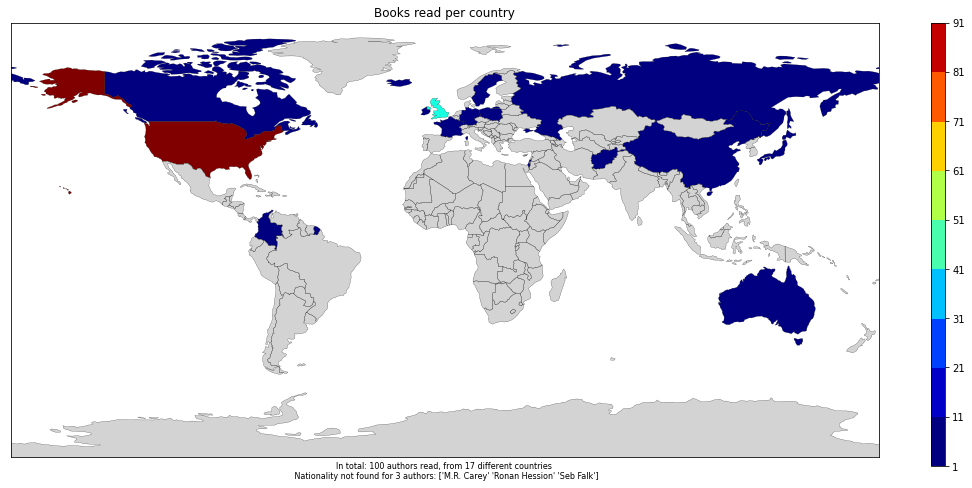

In [140]:
# Choose the minimum and maximum values to display
# The default is the respective minimum (usually 1) and maximum number of books read from the country dataframe above
vmin=np.nanmin(df['Books read'])
vmax=np.nanmax(df['Books read'])


# We create a colourmap (don't mess with this!)
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)


# Here we can define the bins used for plotting, the interval is the width of the bin
# It will scale between the minimum (vmin) and maximum (vmax) values chosen at the top of this cell
interval=10
bounds = np.arange(vmin,vmax+interval,interval)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

# Create the figure
fig,ax=plt.subplots(figsize=(20.0,8.0),)
df.plot(column='Books read',legend=False,scheme='user_defined',ax=ax,cmap=cmap,classification_kwds={'bins':bounds[1:]},missing_kwds={'color': 'lightgrey'},)

# Comment out this line if you do not want the outlines of the countries plotted
df['geometry'].boundary.plot(ax=ax,color='black',linewidth=0.2)

ax.set_title('Books read per country')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(-180,180)
ax.set_ylim(-90,90)

# Creating a colourbar
cax = fig.add_axes([.85, 0.11, 0.01, 0.77])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=bounds[1], vmax=bounds[-1]))
sm._A = []
cb = fig.colorbar(sm, cax=cax,cmap=cmap, norm=norm, ticks=bounds, boundaries=bounds,)

# Adding some text to the bottom of the plot
ax.set_xlabel('In total: {} authors read, from {} different countries \n Nationality not found for {} authors: {}'.
              format(int(df['Authors read'].sum()),len(np.unique(ndfd['Country'])),(ndfd['Country']=='None').sum(),np.unique(ndfd['Author'][ndfd['Country']=='None'])),fontsize=8,)

# Saving the figure in a PNG format
plt.savefig(f'{person}_books_read.png',bbox_inches='tight',padding=0,dpi=400)

It may be the case that you do not want the maximum value to be the upper limit of the bins. In my case, the number of books from the US and UK far outweigh all others, so countries with less 10 books cannot be distinguished.

In this case, we can set the upper limit to 10+ (saturating the US and UK), so the values between 0-10 can be distinguished more clearly.

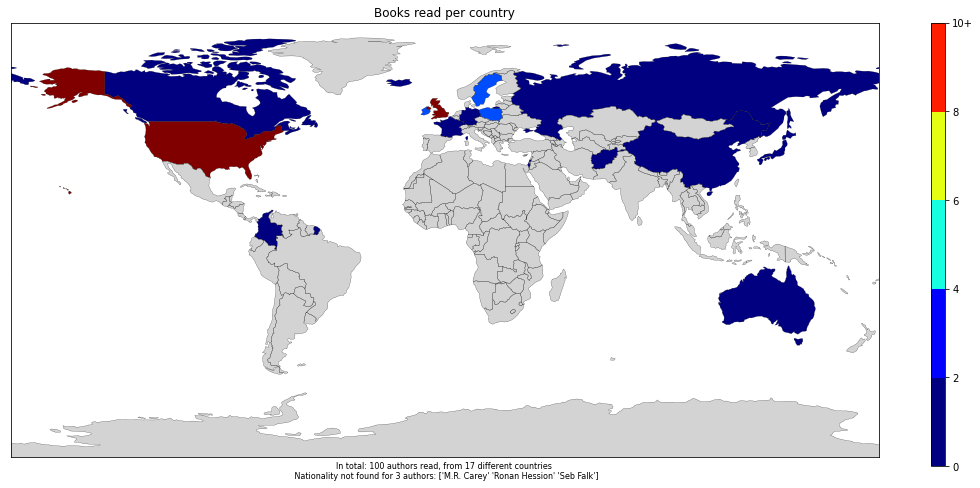

In [143]:
# Here we put in fixed values
vmin=0
vmax=10

cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

# Now we can use a smaller interval
interval=2
bounds = np.arange(vmin,vmax+interval,interval)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

fig,ax=plt.subplots(figsize=(20.0,8.0),)
df.plot(column='Books read',legend=False,scheme='user_defined',ax=ax,cmap=cmap,classification_kwds={'bins':bounds[1:]},missing_kwds={'color': 'lightgrey'},)
df['geometry'].boundary.plot(ax=ax,color='black',linewidth=0.2)

ax.set_title('Books read per country')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(-180,180)
ax.set_ylim(-90,90)

cax = fig.add_axes([.85, 0.11, 0.01, 0.77])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=bounds[1], vmax=bounds[-1]))
sm._A = []
cb = fig.colorbar(sm, cax=cax,cmap=cmap, norm=norm, ticks=bounds, boundaries=bounds,)

# We can also change the label of the largest bin to be 10+
cax.set_yticklabels(np.hstack([bounds[:-1].astype(int),f'{bounds[-1].astype(int)}+']))

ax.set_xlabel('In total: {} authors read, from {} different countries \n Nationality not found for {} authors: {}'.
              format(int(df['Authors read'].sum()),len(np.unique(ndfd['Country'])),(ndfd['Country']=='None').sum(),np.unique(ndfd['Author'][ndfd['Country']=='None'])),fontsize=8,)

plt.savefig(f'{person}_books_read.png',bbox_inches='tight',padding=0,dpi=400)

We can do the exact same thing for the number of authors read for each country. We can also change the colourmap (find a full list of options [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html))

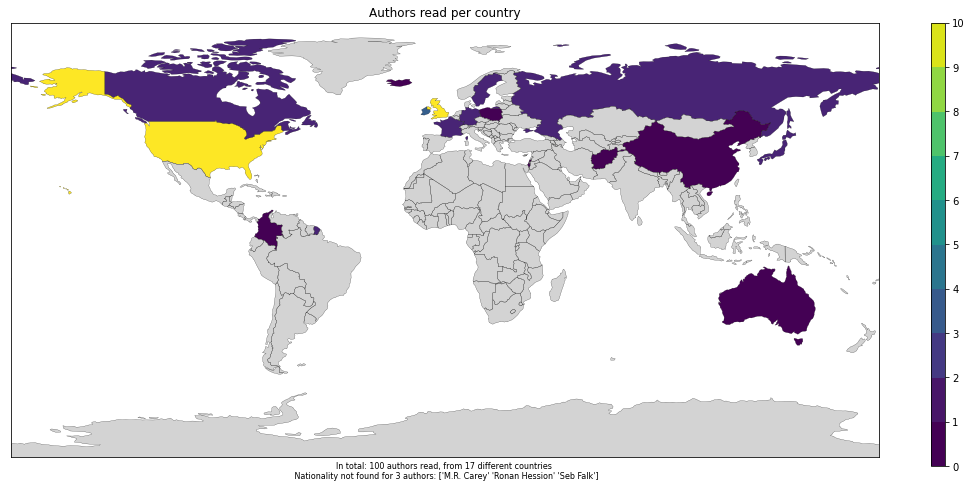

In [147]:
# define the bins and normalize

vmin=0 #np.nanmin(df['Authors read'])
vmax=10 #np.nanmax(df['Authors read'])

# The colourmap 'viridis' is used here
cmap = plt.cm.viridis
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

interval=1
bounds = np.arange(vmin,vmax+interval,interval)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

fig,ax=plt.subplots(figsize=(20.0,8.0),)

# Here we have changed to data to be plotted to 'Authors read
df.plot(column='Authors read',legend=False,scheme='user_defined',ax=ax,cmap=cmap,classification_kwds={'bins':bounds[1:]},missing_kwds={'color': 'lightgrey'},)

df['geometry'].boundary.plot(ax=ax,color='k',linewidth=0.2)

ax.set_title('Authors read per country')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(-180,180)
ax.set_ylim(-90,90)

cax = fig.add_axes([.85, 0.11, 0.01, 0.77])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=bounds[1], vmax=bounds[-1]))
sm._A = []
cb = fig.colorbar(sm, cax=cax,cmap=cmap, norm=norm, ticks=bounds, boundaries=bounds,)

ax.set_xlabel('In total: {} authors read, from {} different countries \n Nationality not found for {} authors: {}'.
              format(int(df['Authors read'].sum()),len(np.unique(ndfd['Country'])),(ndfd['Country']=='None').sum(),np.unique(ndfd['Author'][ndfd['Country']=='None'])),fontsize=8,)

plt.savefig(f'{person}_authors_read.png',bbox_inches='tight',padding=0,dpi=400)